# **introduction**

I am Gavriel Michaeli (209283720) ,computer science student who is passionate about data science.Since I work in the field of cars and I really like cars, I chose to do my project in this field.


# **The problem we deal with**

At a time when almost every family has a car and there is a high frequency of changing cars, many people wonder what the correct car price they should ask or a much time it will take to sell the car, or conversely what the real price of the car they want to buy . Most of the time people can search for vehicles similar to what they want to buy, but they won't always find one or they won't be able to get a correct price estimate.

I decided to solve this problem and put an end to this problem by building a smart AI model that will solve it.

# **About the project**

In this project we will use a database that we have on vehicle features, such as: company, type, time of sale, price and more, in order to predict the prices of the vehicles and the range of the time it will take to sell them.

First we will clean the data, after that we will present the data in a graphic display from which we can learn things about the data and the vehicles.
In addition, we will use PCA so that we can better understand the information we have and from which we can learn how to bulid the AI models.

 After that, an **ANN** model will be built in order to predict the time of the sales period and will be compared with a ready ANN model.
 
 And finally we will use models to predict the price of the vehicle and the SHAP values ​​in order to see what affects the prices of the vehicle mainly.

# **later in the project**

Later on in the project,I will check the cleaning process and see how can i impove that.

Also I would like to add more graphs that will show the different car companies and which company actually sells the most.
In addition, we would like to see what the average price is for the 20 best-selling companies.
We would like to add more graphs that will eventually show the buyers or sellers what they should buy or how much they should sell for, and for the buyers which car will ultimately be the most worthwhile for them to buy so that whenever they want to sell the car it will be easier for them.


In addition, I want to see from the models we built which variable most affects the price.

In the end we would like to obtain for each vehicle what is the average time it will take to sell and what is the appropriate price for which he should sell the vehicle, or what is the correct price that someone should pay for his vehicle.

# **Exploratory Data Analysis**

Now let's export the data set into pandas dataframe,and import the libraries we will use.

In [2]:
from google.colab import files
import pandas as pd
import numpy as np
import io
import torch
import torch.nn as nn
import torch.functional as F
import torchvision
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [31]:
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['cars1.csv']))

Saving cars1.csv to cars1 (2).csv


# **The data**

In [54]:
df

,level_0,index,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,...,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,number_of_photos,duration_listed,old
0,0,0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,...,2.5,universal,False,owned,all,10900.00,False,9,16,new
1,1,1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,...,3.0,universal,False,owned,all,5000.00,True,12,83,new
2,2,2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,...,2.5,suv,False,owned,all,2800.00,True,4,151,new
3,3,3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,...,3.0,sedan,False,owned,all,9999.00,True,9,86,new
4,4,4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,...,2.5,universal,False,owned,all,2134.11,True,14,7,new
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38468,38468,38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,...,3.5,sedan,False,owned,front,2750.00,True,5,301,new
38469,38469,38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,...,2.2,hatchback,False,owned,front,4800.00,True,4,317,new
38470,38470,38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,...,3.5,sedan,False,owned,front,4300.00,False,3,369,new
38471,38471,38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,...,2.0,minivan,False,owned,front,4000.00,True,7,490,new


As we mentioned in the introduction, the data has 38531 rows and 18 columns

# **First let's clean the data**

first we will drop all Nan values or empty values:


In [32]:
df.dropna(axis=0,how='any',thresh=None,subset=None,inplace=True)

now we will check if there are duplicated rows

In [33]:
df[df.duplicated()].shape[0]

48

we will drop all duplicated

In [34]:
df = df.drop_duplicates()

Now lets see what is the min and max value fot the price, and let's check how much they appear

In [ ]:
print(f'min value for the price={df["price_usd"].min()}')
print(f'max value for the price={df["price_usd"].max()}')
print(f'the min value appears:{df[df["price_usd"]==df["price_usd"].min()].shape[0]} times')
print(f'the max value appears:{df[df["price_usd"]==df["price_usd"].max()].shape[0]} times')
print(f'there price between{df["price_usd"].value_counts(bins=[40000,50000])}')
print(f'prive between{df["price_usd"].value_counts(bins=[0,100])}')
print(f'price between{df["price_usd"].value_counts(bins=[0,200])}')

min value for the price=1.0
max value for the price=50000.0
the min value appears:5 times
the max value appears:2 times
there price between(39999.999, 50000.0]    126
Name: price_usd, dtype: int64
prive between(-0.001, 100.0]    15
Name: price_usd, dtype: int64
price between(-0.001, 200.0]    108
Name: price_usd, dtype: int64


We see that between 0-100 and 40000-50000 there are less values .so let's update the price to be in better range

The reason we are doing the cleaning of the data is because in the section of building a machine learning model the cars that fall to far apart from the mean value of price cause problems and decrease the accuracy of the model. it happans because that there are not enough edge cases in order to build accurate model for them.

In [ ]:
#i need to check this because maybe it ok to not do this. ,aybe it is better to do it by number of cars per year.
not_to_cheap = df["price_usd"] > 100
not_to_expensive= df["price_usd"] < 40000
df = df.where(not_to_cheap & not_to_expensive).dropna()
df = df.where(not_to_expensive).dropna()
print(df["price_usd"].value_counts(bins=[40000,50000]))

Series([], Name: price_usd, dtype: int64)


In [ ]:
len(df)

38332

We have 38332. This means we deleted 199 rows, which is fine and not a lot compared to our amount of data

# **Visualising The Data**((i will add more)

**Visualization using graphs can teach us a lot about our data. In this part we will try to understand what is in our data by means of different graphs and deduce from it things that can help us in the future and even others in the future who want to buy or sell a car.**



In [21]:
import matplotlib.pyplot as plt; 
import seaborn as sns

**First let's start with a few pieces of information that every seller or buyer will want to know when buying or selling a car.**

The goal is that by presenting the data we will be able to help the buyer in choosing his vehicle and also help the seller when selling his vehicle.


**The first** thing that can surely interest every person is what is the average time it takes to sell a car from each company.
From this information, the buyer or seller will receive information about the average time it takes to sell a car or, for the buyer, how long it will take him to sell a car in the future.

lets plot The 10 fastest selling companies.

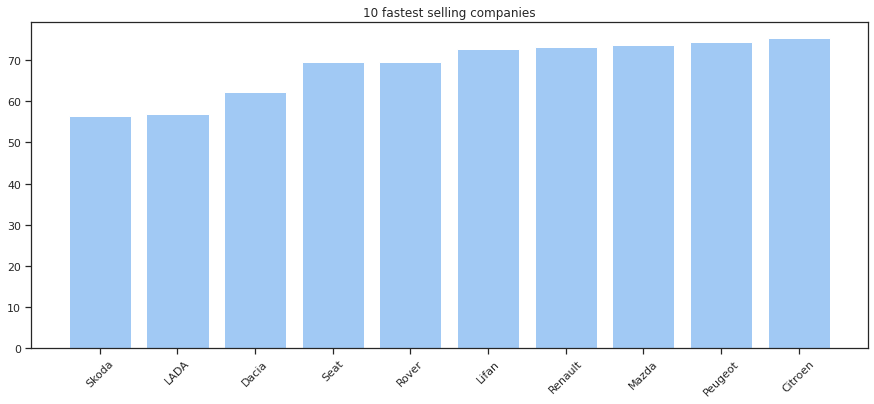

In [46]:
time_avg={}
comp=list(df["manufacturer_name"].unique())
for x in comp:
  df_comp=df[df["manufacturer_name"]==x]
  time_avg[x]=(df_comp["duration_listed"].sum())/df_comp.shape[0]
time_avg={k: v for k, v in sorted(time_avg.items(), key=lambda item: item[1])}

company = list(time_avg.keys())
time_sell = list(time_avg.values())
plt.figure(figsize=(15,6))
plt.xticks(rotation = 45)
plt.bar(range(10), time_sell[0:10], tick_label=company[0:10])
plt.title('10 fastest selling companies')
plt.show()

From here we see that the car that sells the fastest is Skoda.
Which could indicate that there is a lot of demand for this car. And of course from here we see the 10 vehicles that sell the fastest, and it is also clear that Skoda Dacia and Lada sell the fastest and then there is a bigger increase.

Now  as we have shown the vehicles that sell the fastest, let's see what the price range is, mean, let's see which vehicle is the cheapest/most expensive among this list of vehicles.

This way every buyer will be able to know which type of company is more expensive and which is less expensive.

In [ ]:
sk=df["manufacturer_name"]=="Subaru"
ld=df["manufacturer_name"]=="LADA"
DC=df["manufacturer_name"]=="Dacia"
se=df["manufacturer_name"]=="Seat"
ro=df["manufacturer_name"]=="Rover"
li=df["manufacturer_name"]=="Lifan"
re=df["manufacturer_name"]=="Renault"
ma=df["manufacturer_name"]=="Mazda"
pe=df["manufacturer_name"]=="Peugeot"
ci=df["manufacturer_name"]=="Citroen"
df_fastest_sell = df.where(sk | ld | DC |se|re|li|re|ma|pe|ci).dropna()

Text(0.5, 1.0, 'The effect of color on sales speed')

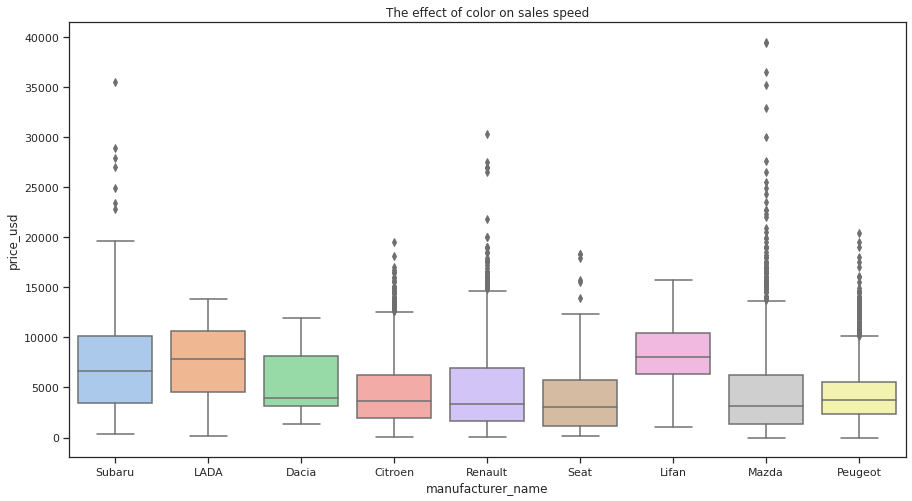

In [ ]:
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(15,8))
sns.boxplot(x="manufacturer_name", y="price_usd",data=df_fastest_sell)
plt.title('The effect of color on sales speed')

First let's explain the box plot : the line in the middle of each rectangle represents the median, the top line of the straight line represents 75% and the bottom line represents the 25th. Everything above and below the bounding lines are outliers points.

We can see for sure that LIFAN is the most expensive company among all these companies, and the cheapest company is SEAT,although we can see that there are many other vehicles that come within its familiar range such as Mazda or Dacia

**Another thing that can be of interest to every buyer is what are the things that most affect the price of the car.**

Every buyer who comes to buy a car should know what the thing that affects
the price of the vehicle.
Does a high engine volume affect the price,
Does the amount of kilometers a car has traveled affect the price and more.
Let's check what are these factors that affect the price.



First let's see the effect of the kilometes on the price of the car.

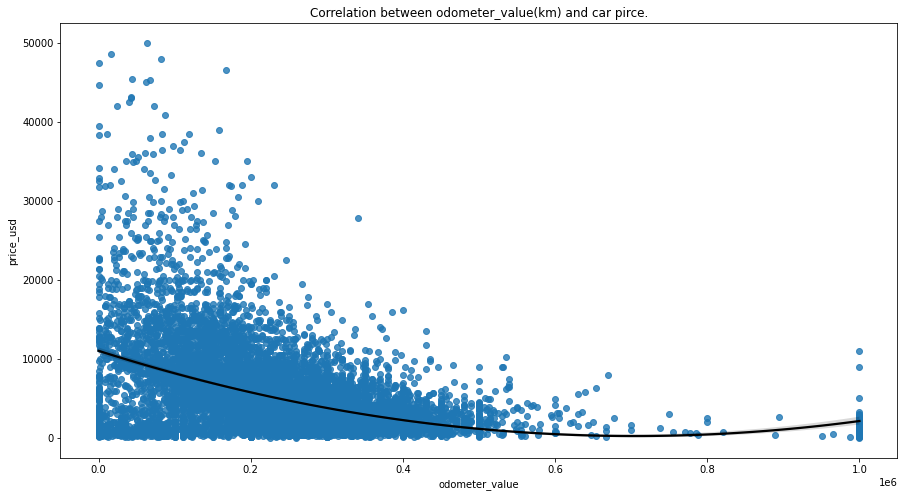

In [ ]:
plt.figure(figsize=(15,8))

plt.title('Correlation between odometer_value(km) and car pirce.')
df_plt = df.head(10000)

ax = sns.regplot(x="odometer_value", y="price_usd", data=df_plt, 
                 line_kws={"color": "black"},order=2)

As you can see, there is a correlation between the price and the km that the vehicle travels up to a certain limit, which means that if the odometer value is higher than the price is lower, sow if a buyer wants to buy a car he needs to know that the odometer vakue really effects the price.


now another thing to look is if there is a correlation between the engine and the car price.
does a big engine mean high price? this question is very important for everyone to understand what affects the vehicle.

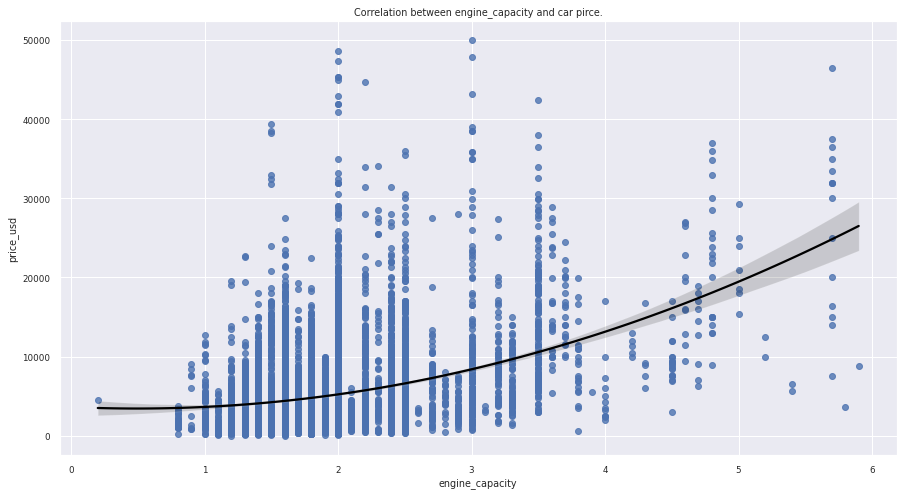

In [ ]:
plt.figure(figsize=(15,8))

plt.title('Correlation between engine_capacity and car pirce.')
df_plt = df.head(10000)

ax = sns.regplot(x="engine_capacity", y="price_usd", data=df_plt, 
                 line_kws={"color": "black"},order=2)

We clearly see that the bigger the engine, the higher the price, so everyone should take into account that if they want a bigger and more powerful engine, then they will have to spend more money, but if someone doesn't care that much about the size of the engine, then they can save money by taking a car with a smaller engine.

Now a very interesting detail would be to check the effect of the year of the vehicle on the price.
As most of us might think, the older a car is, the cheaper it is compared to the same car in later years,
But is this really true for every year?
Let's check it out

Now let's plot the average price of the vehicles each year in order to see how it really affects

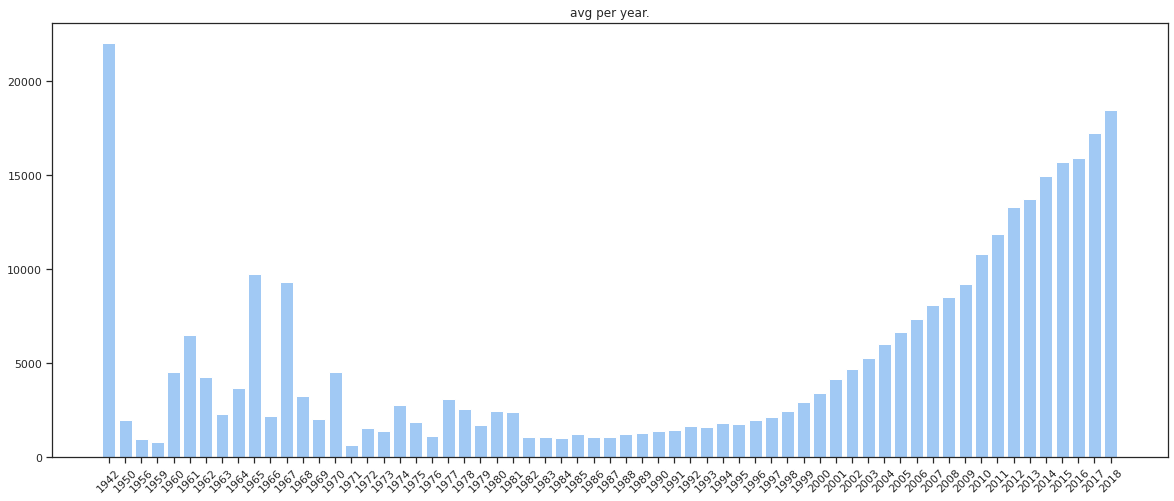

In [48]:
price_avg={}
min_year=df.year_produced.min()
max_year=df.year_produced.max()
for num in range(min_year.astype(int),max_year.astype(int)):
  df_year=df[df.year_produced==num]
  mean=df_year.price_usd.mean()
  if mean>0:
    price_avg[num]=mean
years = list(price_avg.keys())
price_year = list(price_avg.values())
plt.figure(figsize=(20,8))
plt.xticks(rotation = 45)
plt.title('avg per year.')
plt.bar(range(len(price_avg)), price_year, tick_label=years)
plt.show()

Wow, we see here that although starting in 1982 there is an increase every year in the price of the car and there is a correlation after 1982.
But before 1982 it is impossible to say clearly that there is a connection between the year of the vehicle and the price of the vehicle.
Let's try to understand why this happens and try to understand why it is.

First of all let's see how many vehicles from each year there are,
Between the years 1942-1981, so that we know whether it is several vehicles that affect the price or just a few.

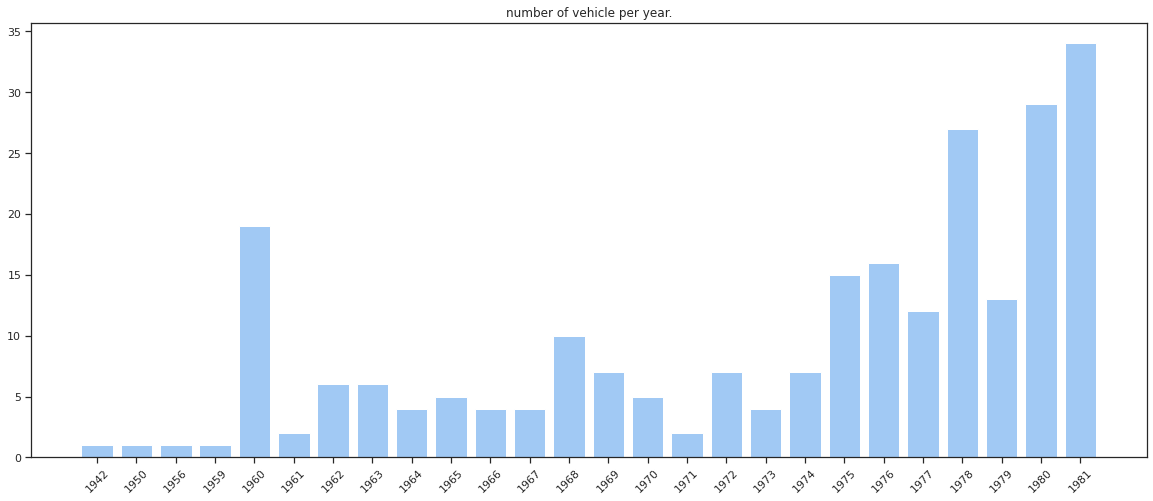

In [50]:
count_year={}
min_year=df.year_produced.min()
max_year=1982
for num in range(min_year.astype(int),max_year):
  df_year=df[df.year_produced==num]
  count=df_year.shape[0]
  if count>0:
    count_year[num]=count
years = list(count_year.keys())
sum_year = list(count_year.values())
plt.figure(figsize=(20,8))
plt.xticks(rotation = 45)
plt.title('number of vehicle per year.')
plt.bar(range(len(count_year)), sum_year, tick_label=years)
plt.show()

We see 2 things:

1. those kind of cars are very rare , and maybe that's is why they are expensive .
2.in most years there are enough vehicles to deduce necessary data

But wait, is every car in these years necessarily an expensive car?
Let's see what is the average kilometer that each vehicle travels each year and from that we will compare and try with what the condition of the vehicles is between the years 1942-1982

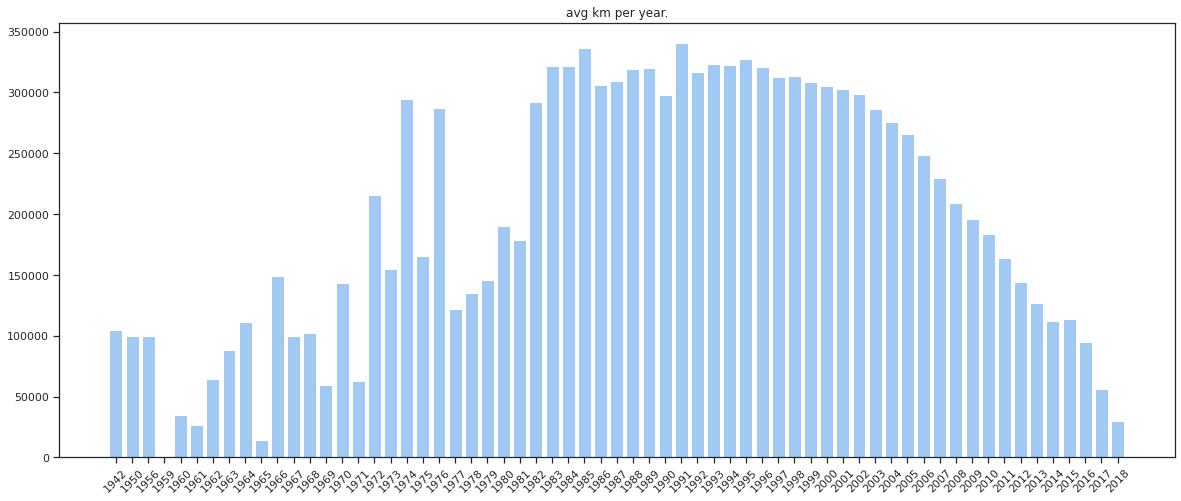

In [51]:
km_year={}
min_year=df.year_produced.min()
max_year=df.year_produced.max()
for num in range(min_year.astype(int),max_year.astype(int)):
  df_year=df[df.year_produced==num]
  mean_km=df_year.odometer_value.mean()
  if mean_km>0:
    km_year[num]=mean_km
years = list(km_year.keys())
sum_year = list(km_year.values())
plt.figure(figsize=(20,8))
plt.xticks(rotation = 45)
plt.title('avg km per year.')
plt.bar(range(len(km_year)), sum_year, tick_label=years)
plt.show()

So really we see according to this graph that the cars between the years 1942-1982 are relatively preserved, that mean, that their mileage is relatively low for their years.

One thing that emerges from this is whether, even in these years, the kilometers traveled by a car really affect their price.

Le'ts checks this:
We will check if there is a corraltion between the cars kilometer and there price.

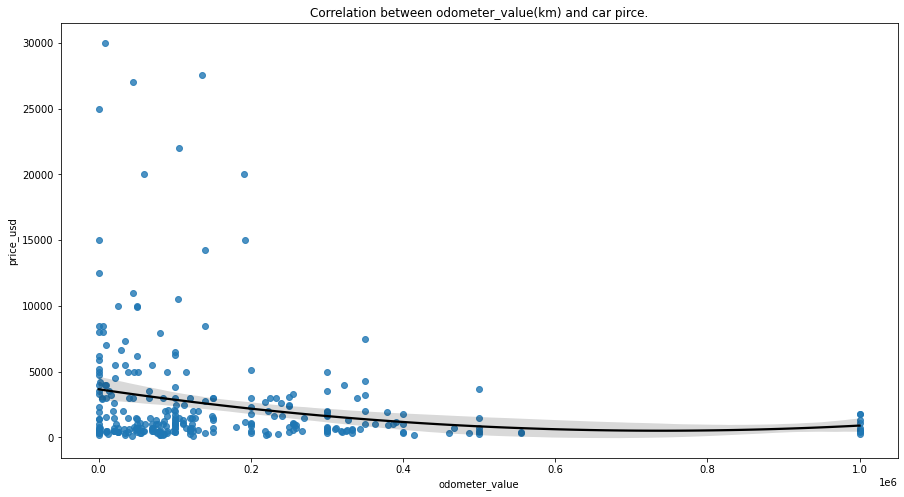

In [39]:
not_old_cars= df["year_produced"] <1983
df_old_cars = df.where(not_old_cars).dropna()
plt.figure(figsize=(15,8))
plt.title('Correlation between odometer_value(km) and car pirce.')
ax = sns.regplot(x="odometer_value", y="price_usd", data=df_old_cars, line_kws={"color": "black"},order=2)

And really even here, even though these are very old vehicles, we see that the mileage of the vehicle has an effect on the price and we even see clearly from the graph that the most expensive vehicles in these years are vehicles with very low mileage and all the other vehicles with high mileage are not that expensive.

Among the most important questions that can help any buyer is also what type of vehicles are kept for the longest time and also which of these companies have the highest average price,                                    
So that if anyone who buys a car wants to keep it for a long time, he knows which company he should buy the most

{'LADA': 4, 'УАЗ': 5, 'Opel': 14, 'Москвич': 33, 'Dacia': 1, 'ВАЗ': 62, 'Fiat': 1, 'Ford': 13, 'Rover': 1, 'Volkswagen': 25, 'Audi': 7, 'ЗАЗ': 5, 'Toyota': 1, 'ГАЗ': 77, 'Volvo': 2, 'Pontiac': 1, 'Nissan': 3, 'BMW': 4, 'Mazda': 1, 'Land Rover': 1, 'Skoda': 1, 'Honda': 1, 'Mercedes-Benz': 29, 'Chrysler': 1}


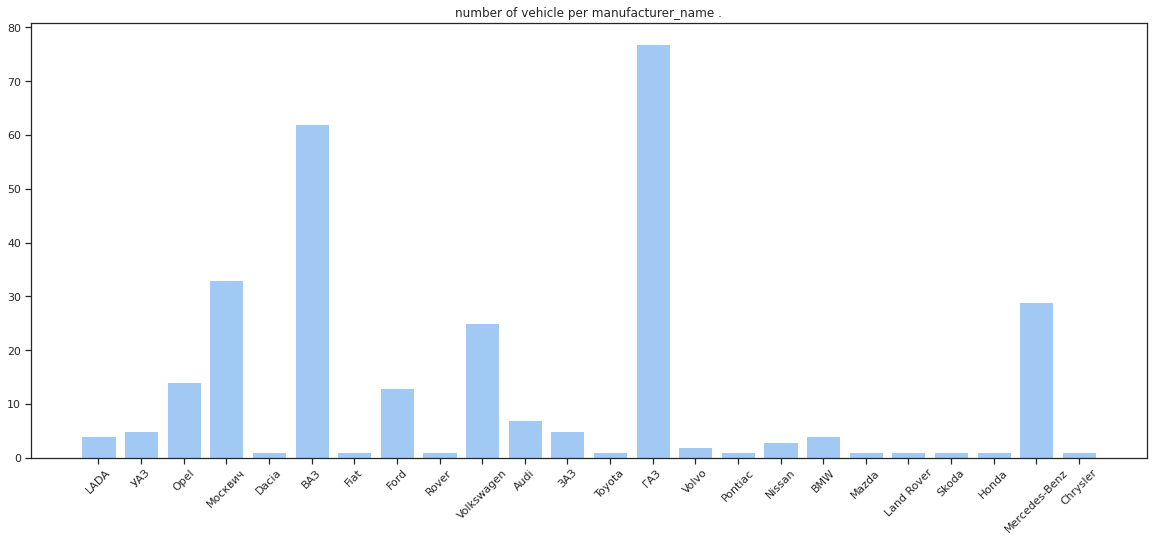

In [52]:
old_cars_company={}
for x in df_old_cars["manufacturer_name"]:
  if x in old_cars_company:
    old_cars_company[x]+=1
  else:
    old_cars_company[x]=1
print(old_cars_company)
cars_comp = list(old_cars_company.keys())
number = list(old_cars_company.values())
plt.figure(figsize=(20,8))
plt.xticks(rotation = 45)
plt.title('number of vehicle per manufacturer_name .')
plt.bar(range(len(old_cars_company)), number, tick_label=cars_comp)
plt.show()

From this graph we clearly see Mercedes, Volkswagen, Москвич, BA3, RA3
They are the vehicles that have the most vehicles between the years 1942-1982, so it may be possible to conclude that they are the vehicles that are kept the longest.

Now a very interesting thing would be to see the distribution of the prices of the vehicles between these years and the newer vehicles, so we can understand if the price of the vehicles really increased until 1982 compared to the other vehicles.

In [63]:
df["old"]=""

In [45]:
df = df.reset_index()
for i in range(len(df)):
  if df.year_produced.loc[i]<1983:
    df.loc[i, ['old']] = ["old"]
  else:
    df.loc[i, ['old']] = ["new"]

Text(0.5, 1.0, 'The effect of color on sales speed')

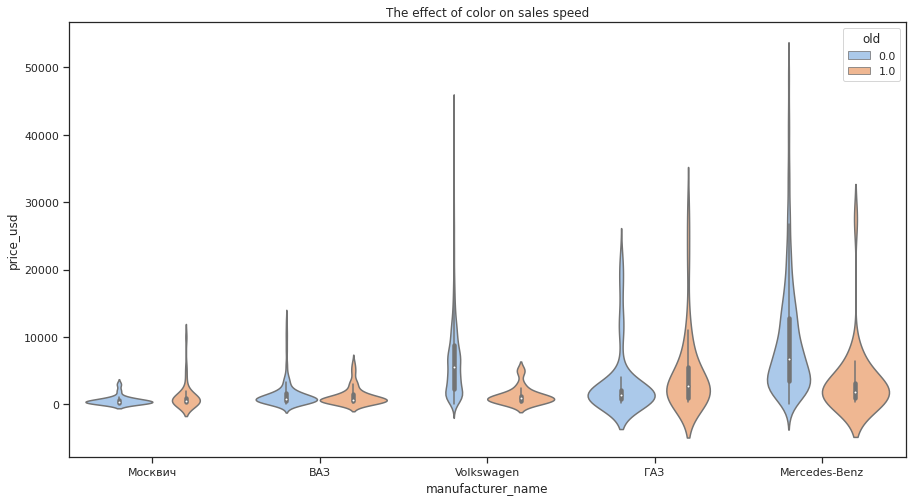

In [44]:
li=df["manufacturer_name"]=="Mercedes-Benz"
re=df["manufacturer_name"]=="Москвич"
ma=df["manufacturer_name"]=="Volkswagen"
pe=df["manufacturer_name"]=="ГАЗ"
ci=df["manufacturer_name"]=="ВАЗ"
df_old_sell = df.where(li|re|ma|pe|ci).dropna()
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(15,8))
sns.violinplot(x="manufacturer_name", y="price_usd",data=df_old_sell,hue="old")
plt.title('The effect of color on sales speed')

We can certainly see that Москвич and ГАЗ are the two companies that the older cars cost in avg more then the newer cars.
also in years 1942-1982 the most expensive cars are mercedes and ГАЗ have the most expensive vehicles in these years.
That is, we see that there are vehicles from these companies that are very expensive compared to other companies and their average is also higher.



Now that we have researched and seen that there are old vehicles that really have a high cost in relation to their years, it fits with the fact that vintage vehicles are defined as vehicles that have been on the road for 40 years, and that's really how it fits with the data because such vehicles are rarer as we have shown and some of them are also really expensive.

**now lets go back to explore things that will help all ...**

now its would be very intresting to see if the number of photos the seller adds to the  ad really helps selling the car fasrer.
it could tell us if its necessary to add photos and how much is good

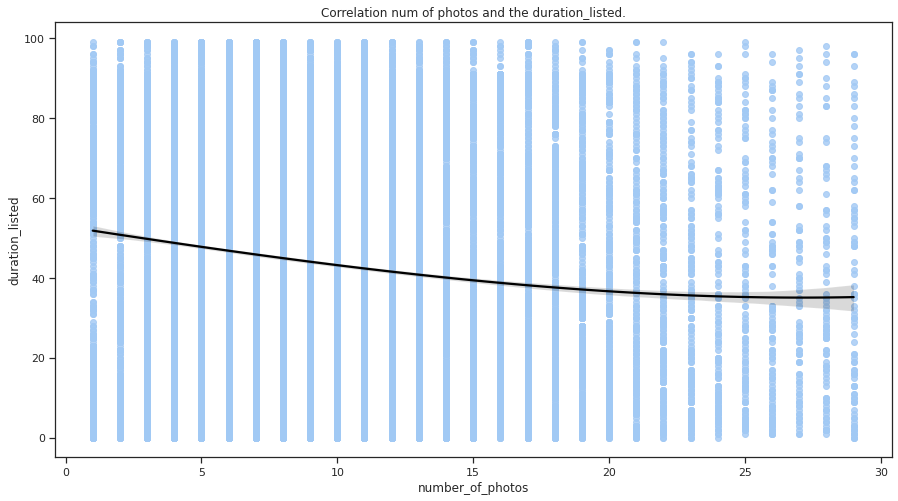

In [60]:
under_1000=df["duration_listed"]<100
under_30_pho=df["number_of_photos"]<30
df_under_1000=df.where(under_1000 & under_30_pho).dropna()
plt.figure(figsize=(15,8))
plt.title('Correlation num of photos and the duration_listed.')
ax = sns.regplot(x="number_of_photos", y="duration_listed", data=df_under_1000, line_kws={"color": "black"},order=3)

We clearly see that the more pictures there are, the faster the vehicle is sold.
All this is true as you can see up to a certain number of photos because after that it no longer affects the speed of the sale so much.

Now there are people who will eventually want to buy a car that will be the easiest to sell and for that they need to know which companies are the most popular among people.
In addition, there are people who are interested in getting one of the most popular vehicles,  vehicles that are the most sold and there are the most of them among most people.

To that end, let's see what the 10 most popular companies are, that is, the 10 companies that have the most vehicles.


In [63]:
ten_most_popular_companies = df['manufacturer_name'].value_counts().index.tolist()[0:10]
ten_most_popular_companies
df_popular_companies = df[df['manufacturer_name'].isin(ten_most_popular_companies)]

Text(0.5, 1.0, 'average price by city')

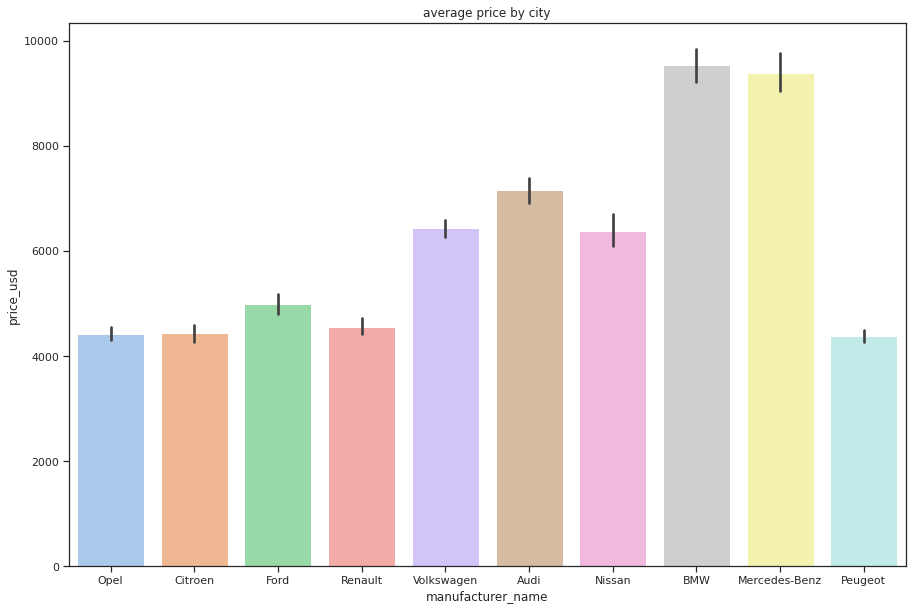

In [64]:
plt.figure(figsize=(15, 10))
sns.barplot(x = 'manufacturer_name', y = 'price_usd' , data = df_popular_companies, edgecolor = 'w').set_title('average price by city')

We now see the 10 most popular companies, and in particular it can be noticed that Mercedes and Mov are the two most popular companies.
Therefore, any person who wants a popular car or a car that will be easy to sell in the future can buy one of these cars.

Now some people will say that they are only interested in knowing what is the average price of that type of vehicle they want, because we see according to our data that there are many types of vehicles, so everyone will say that they are only interested in what is the average price of each company for a certain type of vehicle.
Therefore, let's see what the average price of each type of vehicle is from the 10 most popular vehicles that we have shown.

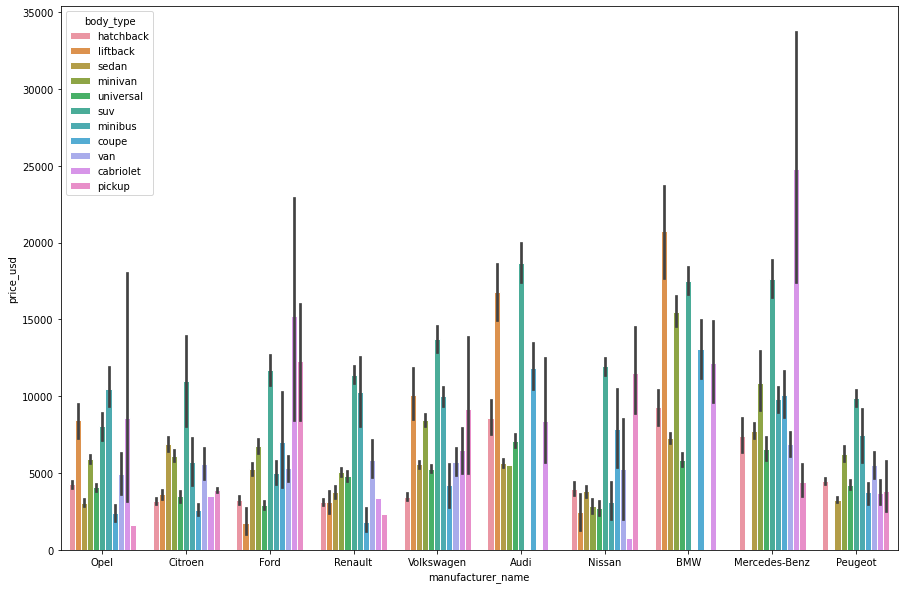

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x = 'manufacturer_name', y = 'price_usd' , hue = "body_type", data = df_popular_companies, edgecolor = 'w')

Now we can see what the price is for each type of vehicle in each company, so that everyone can decide in relation to their budget which company to buy the vehicle from and he receives more accurate information for the type of vehicle he wants, and also each seller will know according to his company what the status of his vehicle is in relation to the other companies And what is the approximate price that he could demand.


Another thing that can really help any buyer or seller is to know if the type of gearbox really affects the price of the car, let's check this and see if there really is an effect of the type of gearbox in each company on the price of the car.


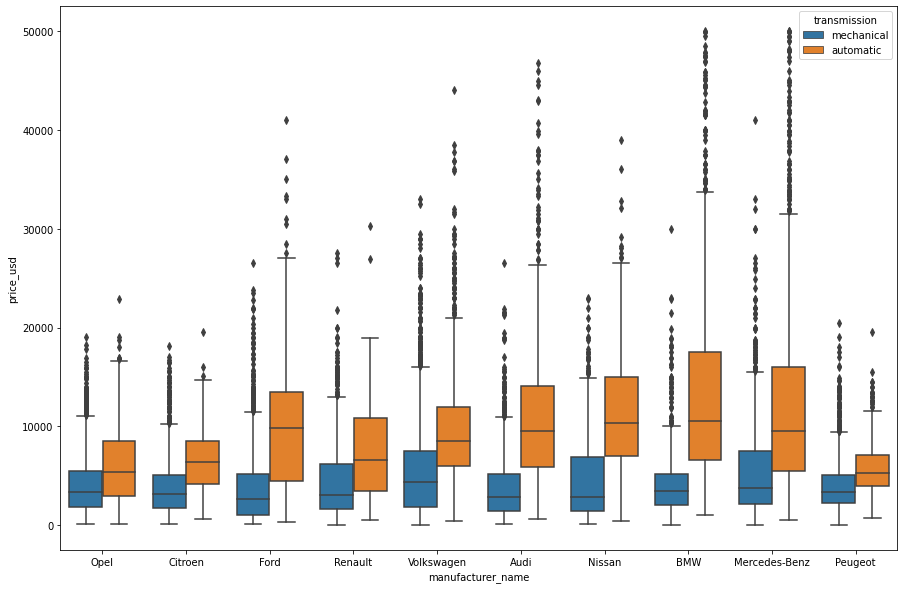

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'manufacturer_name', y = 'price_usd' , hue = "transmission", data = df_popular_companies)

We clearly see that in every company we investigate, the automatic transmission is more expensive than a manual transmission, from this we can conclude that:

1. For those who don't care about the gearbox, then maybe it's worth considering the manual gearbox because it's cheaper.

2. Anyone who sells a car should take into account the type of gearbox they have in order to know what price they should ask for.

In [ ]:
df_num = df.select_dtypes(include=np.number)

del df_num["odometer_value"]
del df_num['engine_capacity']
del df_num['number_of_photos']
del df_num['year_produced']
df_num['car_type']=df['body_type']

In [ ]:
df_num.head()

,price_usd,duration_listed,car_type
0,10900.00,16,universal
1,5000.00,83,universal
2,2800.00,151,suv
3,9999.00,86,sedan
4,2134.11,7,universal


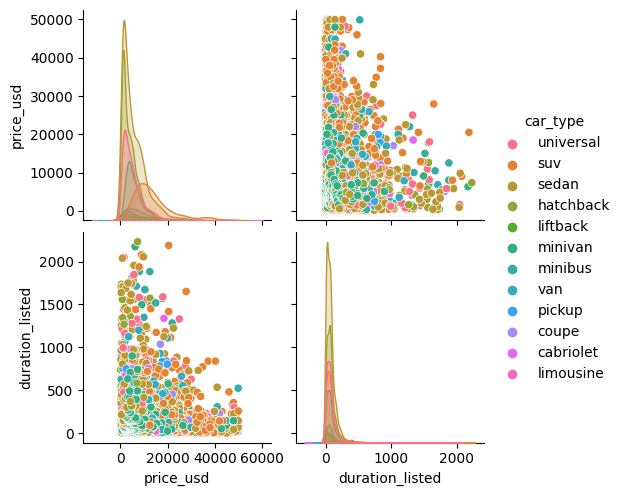

In [ ]:
sns.pairplot(df_num, hue='car_type');

In [ ]:
ten_most_popular_models = df['model_name'].value_counts().index.tolist()[0:3]
ten_most_popular_models

In [ ]:

for car in ten_most_popular_companies:
  df_car=df[df.manufacturer_name==car]
  popular_model = df['model_name'].value_counts().index.tolist()[0:3]

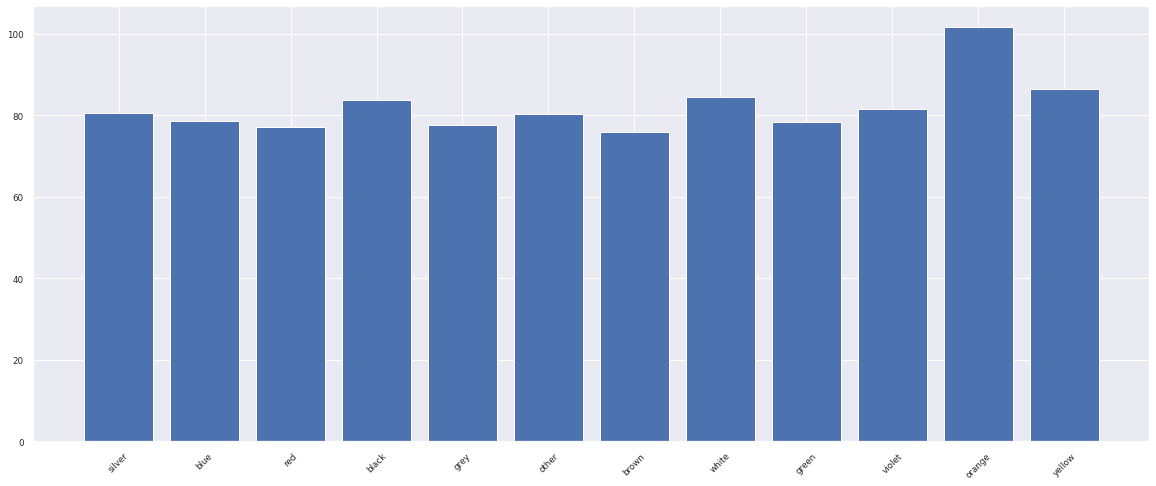

In [ ]:
color_avg={}
colors=list(df.color.unique())
for color in colors:
  df_color=df[df.color==color]
  mean=df_color.duration_listed.mean()
  color_avg[color]=mean
list_colors = list(color_avg.keys())
list_duration = list(color_avg.values())
plt.figure(figsize=(20,8))
plt.xticks(rotation = 45)
plt.bar(range(len(color_avg)), list_duration, tick_label=list_colors)
plt.show()

Let's see the prices of the cars

Text(0.5, 1.0, 'cars Price avg=6507')

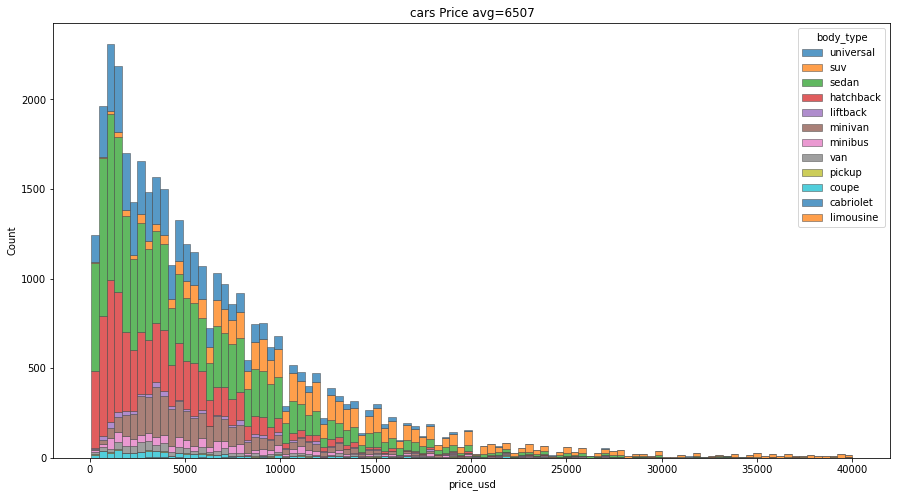

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot( df, x="price_usd", hue="body_type", multiple="stack", palette="tab10", edgecolor=".3", linewidth=.5, bins = 100 )

# get the mean and the standard devation value of home price
mean = df['price_usd'].mean()
plt.title(r'cars Price avg='+str(round(mean)))

we see that the avg price is 6640, and we see that as soon as the price starts to rise there are fewer vehicles.
Also we see that the amount of cars that cost more then 20000 is low.

le'ts see the correlation between the price and the odometer_value(km) .

Now let's see the average price for every year

We can see that starting from 1982 there is an increase from year to year in car prices, which means that starting from 1982 the price of the car is affected by the year. Before 1982 there is no clear correlation between car prices per year.

Now let's see the impect of the engine_capacity on the price

3D graph that shows correlation between year_product,odometer_value and 
price.

Text(0.5, 0.92, 'Correlation between year_product, nodometervalue and pirce.')

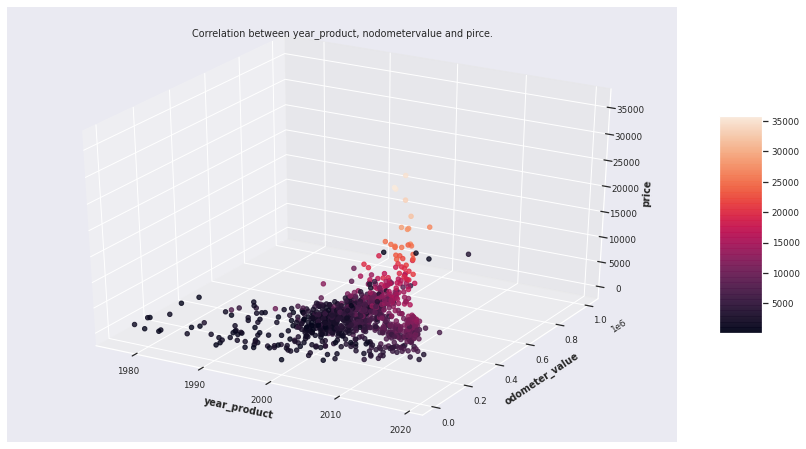

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (15, 8))
ax = plt.axes(projection ="3d")

df_plot = df.head(1000);
x = df_plot["year_produced"]
y = df_plot["odometer_value"]
z = df_plot["price_usd"]
sctt = ax.scatter3D(x, y, z, c = z ,alpha = 0.8 )


ax.set_xlabel('year_product', fontweight ='bold')
ax.set_ylabel('odometer_value', fontweight ='bold')
ax.set_zlabel('price', fontweight ='bold')

fig.colorbar(sctt, ax = ax, shrink = 0.5,  aspect = 5)
plt.title('Correlation between year_product, nodometervalue and pirce.')

Let's see which color sells the fastest

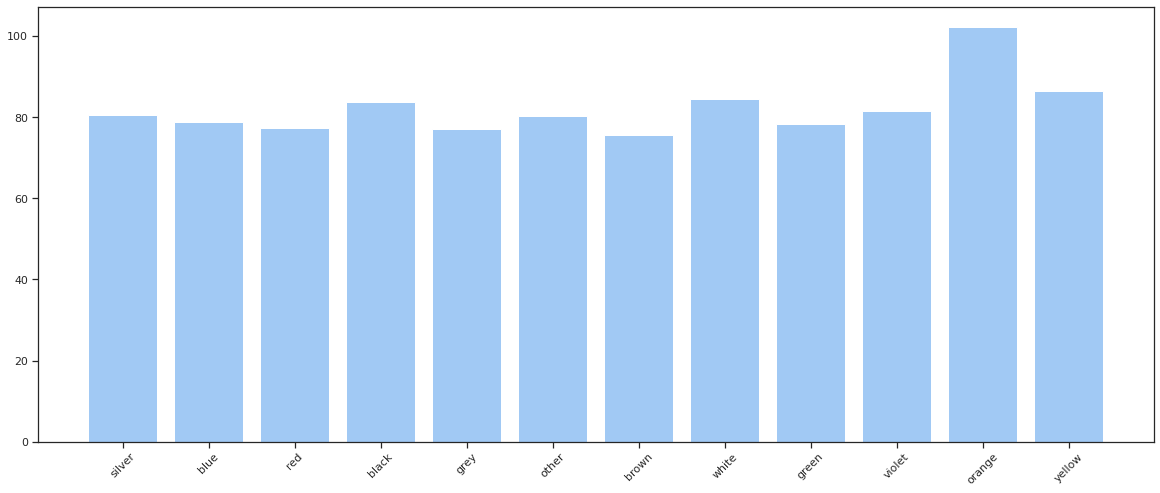

In [ ]:
color_avg={}
colors=list(df.color.unique())
for color in colors:
  df_color=df[df.color==color]
  mean=df_color.duration_listed.mean()
  color_avg[color]=mean
list_colors = list(color_avg.keys())
list_duration = list(color_avg.values())
plt.figure(figsize=(20,8))
plt.xticks(rotation = 45)
plt.bar(range(len(color_avg)), list_duration, tick_label=list_colors)
plt.show()

We see that the color does not have that much of an effect on the speed of the sale, except for the color orange, where we do see that it takes longer than the other colors to be sold

Text(0.5, 1.0, 'The effect of color on the price')

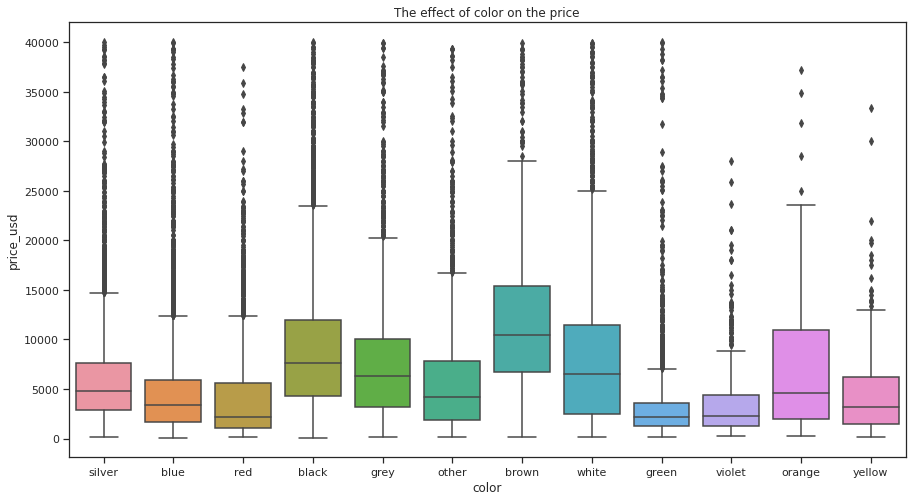

In [ ]:
# drawing the plot
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(15,8))
sns.boxplot(x="color", y="duration_listed",  hue="transmission", data=df)
plt.title('The effect of color on sales speed')

we can see from the graph that the brown color is the most expensive,while the green color less expensive.

lest draw a pie chart that describes the distribution of different cars body

Text(0.5, 1.0, 'Distribution of different house types')

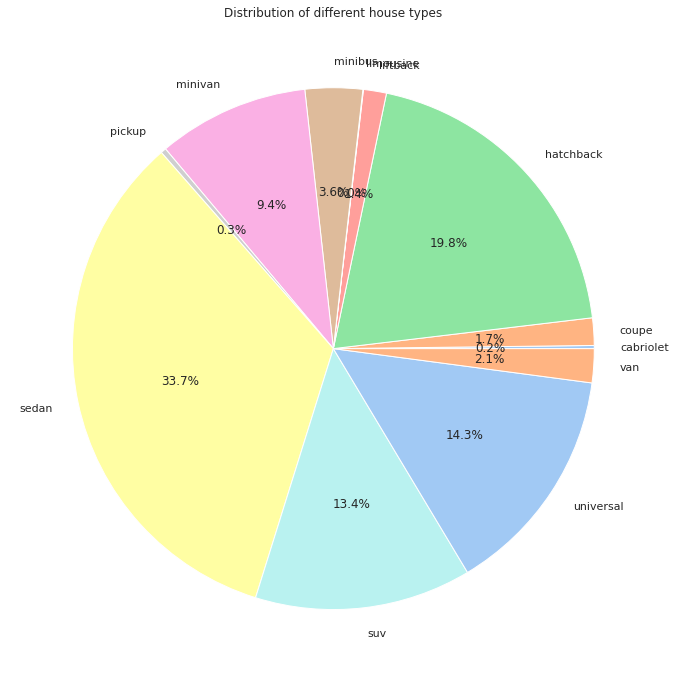

In [ ]:
data = df.groupby("body_type").count()
labels  = data.index.values.tolist()
data_list =  data['manufacturer_name'].tolist()

plt.figure(figsize=(18,12))
plt.pie(data_list, labels = labels, autopct='%.1f%%')
plt.title('Distribution of different house types')

The thing that can be learned from this graph is that most of the vehicles that are sold are private vehicles: such as hatchback, sedan, SUV, universal.
And then it's more commercial vehicles like minivans, buses, etc.

Let's see if the fact that the seller is willing to exchange affects the price according to the type of vehicle

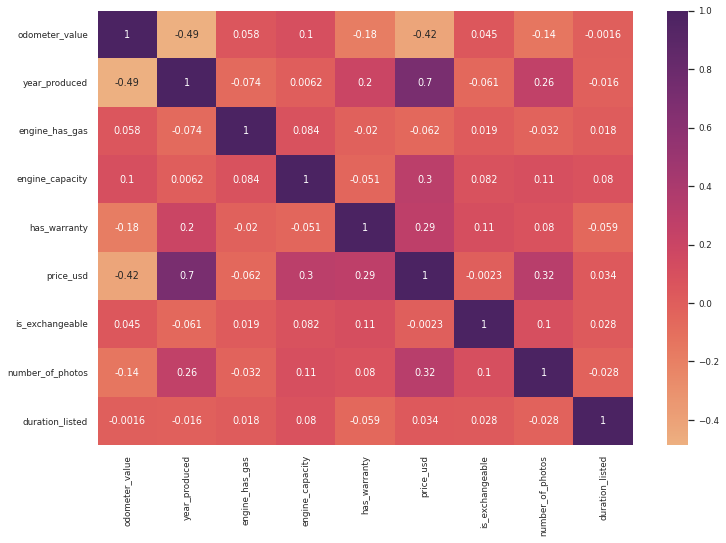

In [ ]:
sns.set(font_scale=0.8)
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap = sns.color_palette("flare", as_cmap=True))

As you can see, we got a pretty strong correlation of 0.72 between the year of manufacture and the price of the vehicle, but the year of manufacture is not enough to predict the price of the vehicle.
So the explanation for this is that only numerical values ​​were taken, so we know that there are other non-numerical characteristics that affect the price of the vehicle, such as the vehicle model and the company, which also have a strong impect on the price

## **I will add more graphs to visualize the data**

# **PCA**

let's us the PCA methood to reduce our data dimension to better understand our data and to see if the is a correlation in our data to now whice model to built for our data.

First let's use StandardScaler to normalize the data and labelEncoder to make colums numeric, also lets seperate the data (features,target)

In [ ]:
df1=df
category_columns=df.select_dtypes(include=['object','bool']).columns.tolist()
print(category_columns)

['manufacturer_name', 'model_name', 'transmission', 'color', 'engine_fuel', 'engine_has_gas', 'engine_type', 'body_type', 'has_warranty', 'state', 'drivetrain', 'is_exchangeable']


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for x in category_columns:
  encoder.fit(df[x])
  df1[x]= encoder.transform(df[x])

<ipython-input-58-479070b0e055>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[x]= encoder.transform(df[x])


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

classes = df1['price_usd'].reset_index(drop=True)

features = df1.drop(['price_usd'], axis = 1) 
features_norm = StandardScaler().fit_transform(features)

Now we will define the PCA algorithm

In [ ]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(features_norm)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2'])
principalDf["price"] = classes

pca.explained_variance_ratio_ 

array([0.14124281, 0.12279681])

First, what are the numbers we got?
What we got are two numbers that represent one column and the other so that 14% represents the difference (variance) in price according to column 1 and 12.2% represents the difference according to column 2

Now that's weird becase according to the heatmap we got 72% correlation between the year_produced and the price_usd and 42% correlation between odometer_value and price_usd so its surprising that the pca didnt find a coraltion that the variance with the price is more then 14%.

Now lets plot the impect of the to colums on the price , but in order to plot it we will add a colum of the price is bins

In [ ]:
principalDf['pirce_bins'] = pd.cut(x=principalDf['price'], bins=[2000, 4500, 7000, 10000, 14000, 19000, 26000, 35000, 46000, 62000, 150000],
                    labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

principalDf.head()

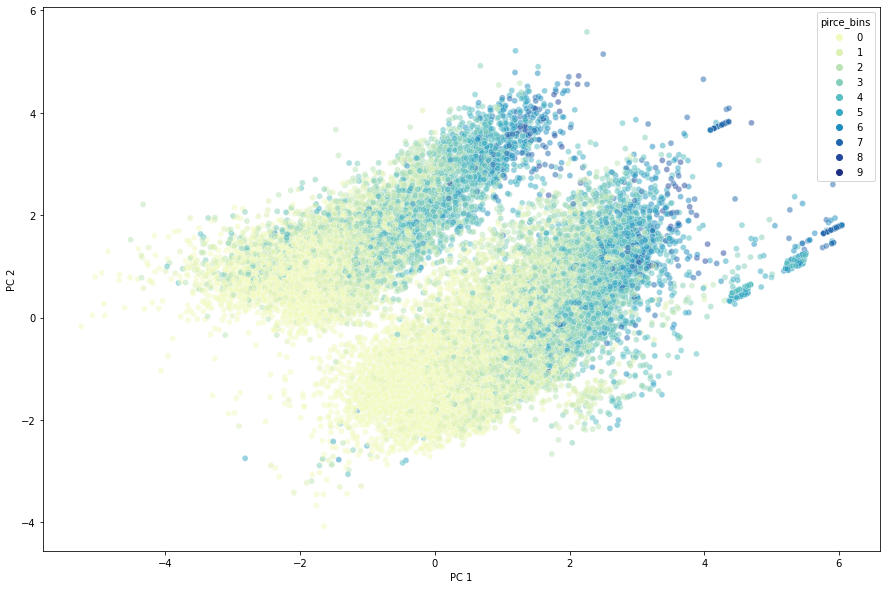

In [ ]:
plt.figure(figsize=(15, 10))
sns.scatterplot( data=principalDf, x="PC 1", y="PC 2", hue="pirce_bins", palette="YlGnBu" , alpha = 0.5  ) 

we can see a correlation between the increase of PC 1 and PC 2 value to the increase in the price value.So we will use it when we are buliding our models becasue we can see a that the 2 main components explain us the variance in price.


# **UMAP**

In [ ]:
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

In [ ]:
import umap

In [ ]:
reducer_2d = umap.UMAP(n_components=2)

In [ ]:
embedding = reducer_2d.fit_transform(features_norm)
embedding.shape

(38473, 2)

In [ ]:
principalDf_2 = pd.DataFrame(data = embedding, columns = ['PC 1', 'PC 2'])
principalDf_2["price"] = classes
principalDf_2['pirce_bins'] = pd.cut(x=principalDf['price'], bins=[2000, 4500, 7000, 10000, 14000, 19000, 26000, 35000, 46000, 62000, 150000],
                    labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

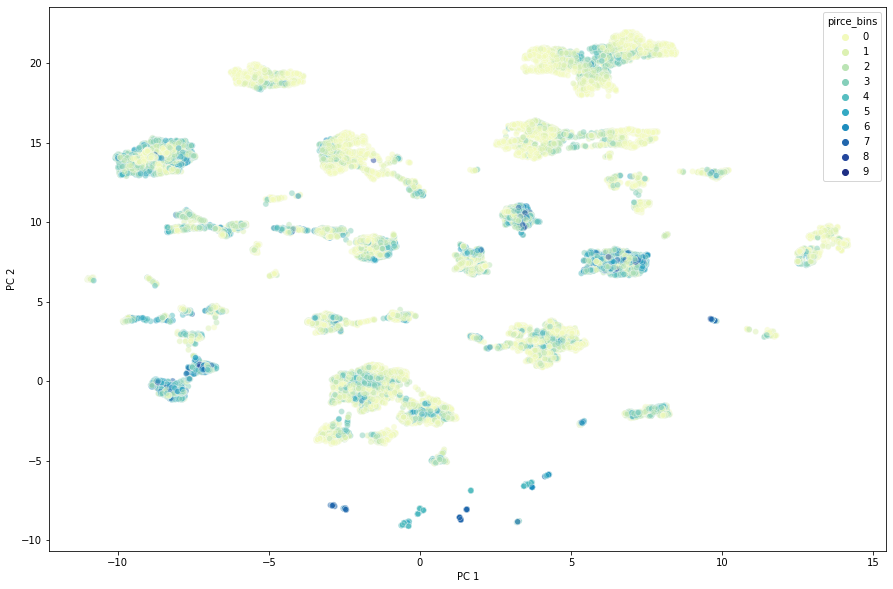

In [ ]:
plt.figure(figsize=(15, 10))
sns.scatterplot( data=principalDf_2, x="PC 1", y="PC 2", hue="pirce_bins", palette="YlGnBu" , alpha = 0.5  ) 

# **ANN-classify the time range of the sale**

we will import from pytorch

In [6]:
import torch
import torch.nn as nn
import numpy as np
import torch.functional as F

In [7]:
df_ann=df

In [8]:
df_ann

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,number_of_photos,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,9,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,12,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,4,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,9,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,14,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,2750.00,True,5,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,hatchback,False,owned,front,4800.00,True,4,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,4300.00,False,3,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,minivan,False,owned,front,4000.00,True,7,490


### **We will transfer the sales time to a discrete value so that we predict the sales range for each vehicle**

In [ ]:
df_ann

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,number_of_photos,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,9,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,12,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,4,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,9,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,14,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,2750.00,True,5,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,hatchback,False,owned,front,4800.00,True,4,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,4300.00,False,3,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,minivan,False,owned,front,4000.00,True,7,490


In [85]:
from sklearn.preprocessing import LabelEncoder
var_columns = [c for c in df_ann if c not in "duration_listed"]
encoder = LabelEncoder()
for x in var_columns:
  encoder.fit(df_ann[x])
  df_ann[x]= encoder.transform(df_ann[x])

In [86]:
print('Shape of all dataset: {}'.format(df.shape))

var_columns = [c for c in df_ann if c not in "duration_listed"]
x=df_ann.loc[:,var_columns]
y = df_ann.loc[:,'duration_listed']
print(x.shape)
print(y.shape)

Shape of all dataset: (38473, 18)
(38473, 17)
(38473,)


Let's separate to train and valid and normalize the data.
also we will use labelencoder to make all colums numeric

In [92]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

(30778, 17)
(30778,)
(7695, 17)
(7695,)


In [88]:
y_train=y_train.values.reshape(30778,1)
y_valid=y_valid.values.reshape(-1,1)
print(y_train.shape)

(30778, 1)


In [93]:
from sklearn.preprocessing import StandardScaler
x_scalar=StandardScaler()
x_train = x_scalar.fit_transform(x_train)
x_valid = x_scalar.transform(x_valid)

lets make the data to be torch

In [14]:
x_train = torch.tensor(x_train, dtype=torch.float)
x_valid = torch.tensor(x_valid, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.float)
y_valid = torch.tensor(y_valid, dtype=torch.float)

**Neural network structure**

In [15]:
class NN(nn.Module):
  def __init__(self):
    super(NN,self).__init__()
    self.layer1=nn.Linear(x_train.shape[1],1)
    
    
  def forward(self,x):
    x=self.layer1(x)
    return x

To use CrossEntropyLoss() we have to make the y_train to be **dtype=torch.long**

In [ ]:
y_train = torch.tensor(y_train,dtype=torch.long)

<ipython-input-75-6d63635beb05>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train,dtype=torch.long)


Let's define the model the optimizer and the loss.

We will use the crossEntropy because we have multi class classifiction

In [69]:
#import torch.optim as optim
model1 = NN()
optimizer= torch.optim.Adam(model1.parameters(),lr=0.3)
loss_fn=nn.MSELoss()

train the model

In [70]:
loss_per_iter={}
epochs=111
for i in range(epochs):
  #initialize the model parameter
  #optimizer.zero_grad(set_to_none=True)
  #calculate the loss
  output=model1(x_train)
  loss=loss_fn(output,y_train)
  #backpropagation
  loss.backward()
  #update the parameters
  optimizer.step()
  if(i%10==0):
    loss_per_iter[i]=loss
    print(f"epochs: {i}......loss:{loss}")

epochs: 0......loss:19413.3359375
epochs: 10......loss:18817.0078125
epochs: 20......loss:18275.62109375
epochs: 30......loss:17777.091796875
epochs: 40......loss:17363.62890625
epochs: 50......loss:16811.6796875
epochs: 60......loss:16445.455078125
epochs: 70......loss:16236.2392578125
epochs: 80......loss:15708.1728515625
epochs: 90......loss:15446.3720703125
epochs: 100......loss:15478.11328125
epochs: 110......loss:15314.45703125


We see that we get very good results on the training set and every EPOCH there is an improvement of the error.

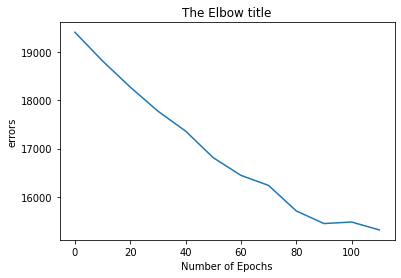

In [71]:
with torch.no_grad():
  num_iter = list(loss_per_iter.keys())
  loss_per_iter = list(loss_per_iter.values())
  plt.plot(num_iter,loss_per_iter)
  plt.title('The Elbow title')
  plt.xlabel('Number of Epochs')
  plt.ylabel('errors')

Let's see what results we get on our test set.

In [72]:
with torch.no_grad():
  test_inputs = x_valid
  test_outputs = model1(test_inputs)
  test_loss = loss_fn(test_outputs, y_valid)

  print(f'Test Loss: {test_loss.item():.4f}')

Test Loss: 14698.4492


In [84]:
import random
with torch.no_grad():
  var_columns = [c for c in df if c not in ["duration_listed"]]
  pre=df.loc[:,var_columns]
  x=pre.loc[150]
  x = pre.iloc[150,:].to_frame().T

  for i in range (5):
    x=random.randint(0,x_valid.shape[0])
    featurs=pre.iloc[x,:].to_frame().T
    featurs = torch.Tensor(featurs.values)
    print(f'the predicted time: {model1(featurs)[0]} , the real time: {df.loc[x].price_usd}')

the predicted time: tensor([18098.3945]) , the real time: 576
the predicted time: tensor([6242.0103]) , the real time: 1263
the predicted time: tensor([15266.1426]) , the real time: 736
the predicted time: tensor([6328.6499]) , the real time: 1956
the predicted time: tensor([27911.9023]) , the real time: 1484


torch.Size([7695, 17])


# let's comper it to Multi-layer Perceptron (MLP) from sklearn

In [74]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
clf = MLPClassifier(random_state=1,activation='relu',batch_size=100, max_iter=550,learning_rate='adaptive',hidden_layer_sizes=[100],verbose=False)
clf.fit(x_train, y_train)
pre3=clf.predict(x_train)
print(accuracy_score(y_train,pre3))

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


NameError: ignored

# **classify the company**

In [106]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [107]:
df1=df
df_num = df.select_dtypes(include=np.number)
df_num["manufacturer_name"]=df["manufacturer_name"]

<ipython-input-107-50b1fd380d0e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num["manufacturer_name"]=df["manufacturer_name"]


In [108]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
encoder = LabelEncoder()
category_columns=df.select_dtypes(include=['object','bool']).columns.tolist()
for x in category_columns:
  encoder.fit(df[x])
  df1[x]= encoder.transform(df[x])

In [109]:
print('Shape of all dataset: {}'.format(df.shape))
var_columns = [c for c in df_num if c not in ["manufacturer_name"]]
x=df_num.loc[:,var_columns]
y = df_num.loc[:,'manufacturer_name']

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.1, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

Shape of all dataset: (38473, 18)
(34625, 6)
(34625,)
(3848, 6)
(3848,)


In [110]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [111]:
print(x_train_resampled.shape,y_train_resampled.shape)

(38422, 6) (38422,)


In [112]:
from sklearn.preprocessing import StandardScaler
x_scalar=StandardScaler()
x_train_resampled = x_scalar.fit_transform(x_train_resampled)
x_valid = x_scalar.transform(x_valid)

In [ ]:
from imblearn.pipeline import make_pipeline
pipeline = make_pipeline(RandomOverSampler(random_state=42), RandomForestClassifier(random_state=42))
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_valid)

In [ ]:
print(accuracy_score(y_valid,y_pred))

0.32874220374220375


# **Decision tree**

In [113]:
model_tree = DecisionTreeClassifier(max_depth=100, class_weight='balanced') #ccp_alpah is the

print(model_tree.fit(x_train, y_train))
model_tree.fit(x_train_resampled,y_train_resampled)
pre=model_tree.predict(x_valid)
print(model_tree.get_params())
print(y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=100)
{'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 100, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
8484            ВАЗ
31699         Iveco
20249          Audi
16660    Volkswagen
13926       Renault
            ...    
6267        Citroen
11291          Ford
38216      Chrysler
861             Kia
15806    Volkswagen
Name: manufacturer_name, Length: 34625, dtype: object


In [114]:
pre=model_tree.predict(x_valid)

In [115]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics
print(accuracy_score(y_valid,pre))

0.2590956340956341


In [116]:
feature_names=x.columns
feature_importance=pd.DataFrame(model_tree.feature_importances_,index=feature_names)
print(feature_importance)

                         0
odometer_value    0.178355
year_produced     0.151458
engine_capacity   0.169398
price_usd         0.231027
number_of_photos  0.118447
duration_listed   0.151315


# **Forest tree**

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics

clf = RandomForestClassifier(max_depth=40,class_weight='balanced',n_estimators=300)
print(clf.fit(x_train_resampled, y_train_resampled))
pre2=clf.predict(x_valid)
print(accuracy_score(y_valid,pre2))

RandomForestClassifier(class_weight='balanced', max_depth=40, n_estimators=300)
0.3518711018711019


In [121]:
feature_names=x.columns
feature_importance=pd.DataFrame(clf.feature_importances_,index=feature_names)
print(feature_importance[0])

odometer_value      0.182916
year_produced       0.144434
engine_capacity     0.172598
price_usd           0.205311
number_of_photos    0.129943
duration_listed     0.164798
Name: 0, dtype: float64


In [124]:
feat_importances = pd.Series(clf.feature_importances_, index=x.columns)

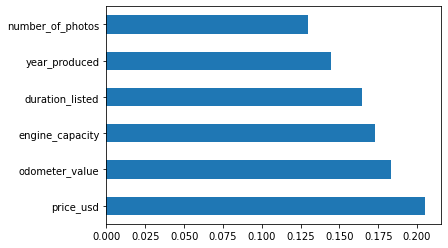

In [125]:
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# **svc**

In [126]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
y_pred=svm.predict(x_valid)
print(accuracy_score(y_valid,y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.02572765072765073


# **Building models for car price prediction**

In [ ]:
df['manufacturer_name'].value_counts()
print(df['manufacturer_name'].unique().size)
print(df['manufacturer_name'].value_counts())

First we will check what are the non numeric colums

In [ ]:
df1=df
category_columns=df.select_dtypes(include=['object','bool']).columns.tolist()
print(category_columns)

[]


We will use labelEncoder to make the non numeric to numeric

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
encoder = LabelEncoder()
for x in category_columns:
  encoder.fit(df[x])
  df1[x]= encoder.transform(df[x])

split our data to train and test 

In [ ]:
from sklearn.model_selection import train_test_split
print('Shape of all dataset: {}'.format(df.shape))
var_columns = [c for c in df if c not in ["price_usd"]]
x=df.loc[:,var_columns]
y = df.loc[:,'price_usd']

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

Shape of all dataset: (38473, 18)
(30778, 17)
(30778,)
(7695, 17)
(7695,)


Now we will use 5 model to predict the car price and we will comper

# **Linear Regression**

We will import the models from Sklearn.
The first model is linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

Linear = LinearRegression()
Linear.fit(x_train,y_train)
Linear.score(x_valid,y_valid)

0.6634560302834166

# **Gradient Boosting**

An acceptable model to use, when you want to predict linear information.
For each training example in this model we try to learn and correct the previous predictions

In [ ]:
import xgboost

grad = xgboost.XGBRegressor().fit(x_train, y_train)
grad.score(x_valid,y_valid)

[17:38:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8911948807059711

# **Decision Trees-Regression**

tree regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt = dt.fit(x_train,y_train)
dt.score(x_valid,y_valid)

0.8175086181723745

# **Random Forest-Regression**

random forest - using multiple trees

In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()
random_forest = random_forest.fit(x_train,y_train)
random_forest.score(x_valid,y_valid)

0.9156293023110835

# **SVR Regression**

As we know, every training sample can be looked at as a vector, so that in the end it will be possible to use SVR so that its purpose is to give the linear classifier on the training group when they are vectors.

In [ ]:
from sklearn.svm import SVR

model_svr = SVR(kernel='rbf')
model_svr.fit(x, y)
model_svr.score(x_valid,y_valid)

# **Comparing the Models with Mean squared error**

In addition we will use MSE so that it will also tell us which model is the best.
Basically this method tells us what is the distance/difference of our prediction from the original price, i.e. what is the variance.

In [ ]:
from sklearn.metrics import mean_squared_error
#linear 
y_pred=Linear.predict(x_valid)
print(f' linear regression mse :{mean_squared_error(y_valid, y_pred)}')
#Gradient Boosting
y_pred=grad.predict(x_valid)
print(f' Gradient Boosting mse :{mean_squared_error(y_valid, y_pred)}')
#Decision Trees-Regression
y_pred=dt.predict(x_valid)
print(f' Decision Trees mse :{mean_squared_error(y_valid, y_pred)}')
#Random Forest-Regression
y_pred=random_forest.predict(x_valid)
print(f' random forest mse :{mean_squared_error(y_valid, y_pred)}')
#svr mse:

 linear regression mse :14235973.234473232
 Gradient Boosting mse :4602544.996286446
 Decision Trees mse :7615849.548801982
 random forest mse :3568458.4790152474


We see that the best model is the random forest with the lower loss of 3629887

# **Compering real price and predction**

We will take the best model (random forest) and we will comper the predicted price to the real price 

In [ ]:
import random
var_columns = [c for c in df if c not in ["price_usd"]]
pre=df.loc[:,var_columns]
x=pre.loc[150]
x = pre.iloc[150,:].to_frame().T

for i in range (5):
  x=random.randint(0,x_valid.shape[0])
  featurs=pre.iloc[x,:].to_frame().T
  print(f'the predicted price: {random_forest.predict(featurs)[0]} , the real price: {df.loc[x].price_usd}')

the predicted price: 3371.1198999999997 , the real price: 3650.0
the predicted price: 5889.82 , the real price: 1600.0
the predicted price: 5428.186699999999 , the real price: 12300.0
the predicted price: 477.76990000000006 , the real price: 7899.0
the predicted price: 2638.5907999999995 , the real price: 2100.0


# **Let's explain our result-explain how each feature affects the model**

Now that we have all the models let's take the best model and explore it.
We would like to check which features affected the model, and for that we will use SHAP

# **SHAP vaules**

SHAP values explain how each feature affects the model, and allows analysis for the dataset 

In [ ]:
!pip install shap

In [ ]:
!pip install --upgrade shap

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')

In [ ]:
import shap
explainer = shap.Explainer(random_forest)
shap_values = explainer(x_valid)

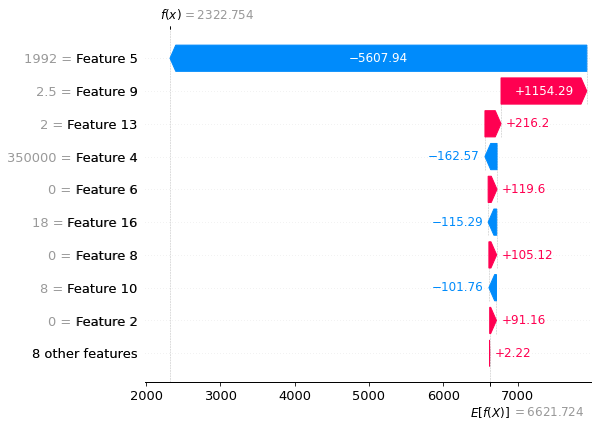

In [ ]:
idx = 3
exp = shap.Explanation(shap_values.values, shap_values.base_values[0][0], shap_values.data)
shap.plots.waterfall(exp[3])

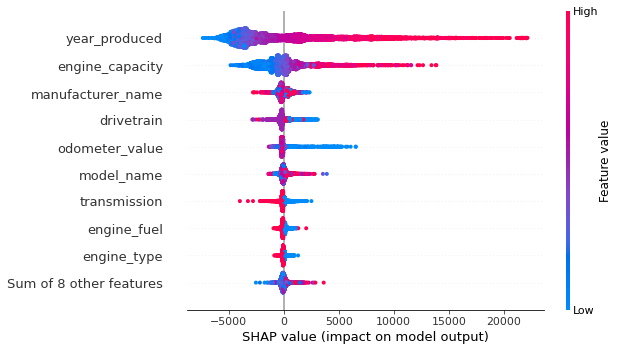

In [ ]:
# visualize the first prediction's explanation
shap.plots.beeswarm(shap_values)

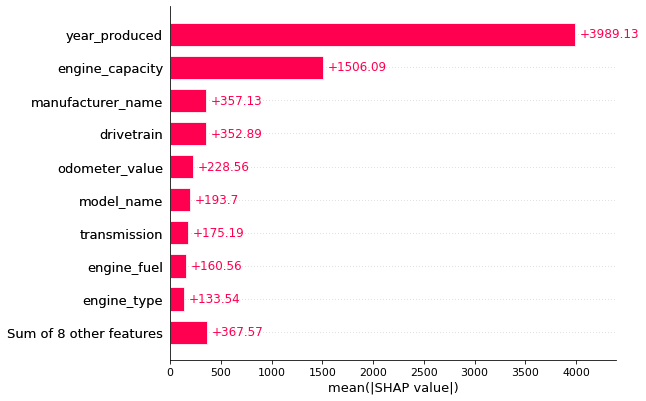

In [ ]:
shap.plots.bar(shap_values)

# **Summary**